<a href="https://colab.research.google.com/github/owenc8/IAT360_final_project/blob/main/final_proj_CV_IAT360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

Making directories

In [3]:
test_dir = '/content/drive/MyDrive/CV_final_project/validation_filesV2'
train_dir = '/content/drive/MyDrive/CV_final_project/train_filesV2'

In [4]:
os.makedirs('/content/drive/MyDrive/CV_final_project/Final_data/images')
os.makedirs('/content/drive/MyDrive/CV_final_project/Final_data/labels')
os.makedirs('/content/drive/MyDrive/CV_final_project/Final_data/images/train')
os.makedirs('/content/drive/MyDrive/CV_final_project/Final_data/images/val')
os.makedirs('/content/drive/MyDrive/CV_final_project/Final_data/labels/train')
os.makedirs('/content/drive/MyDrive/CV_final_project/Final_data/labels/val')

In [5]:
label_dir= "/content/drive/MyDrive/CV_final_project/Final_data/labels"
image_dir="/content/drive/MyDrive/CV_final_project/Final_data/images"

Train

In [6]:
#run it once for copying!
for file in os.listdir(train_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(train_dir, file), os.path.join(label_dir, "train"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(train_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(image_dir,"train", new_filename), "JPEG")
        #shutil.copy(os.path.join(train_dir, file), os.path.join(image_dir, "train"))


Validation

In [7]:
#Copy XML files and jpg files from the test folder to the folders created.
for file in os.listdir(test_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(test_dir, file), os.path.join(label_dir, "val"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(test_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(image_dir,"val", new_filename), "JPEG")
        #shutil.copy(os.path.join(test_dir, file), os.path.join(image_dir, "val"))

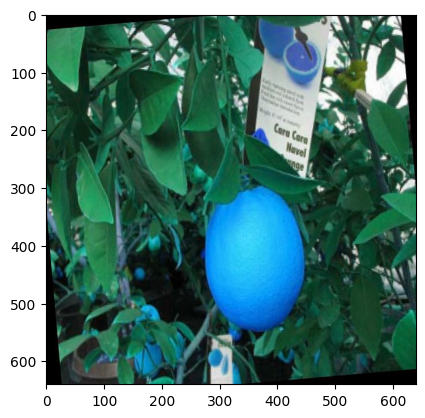

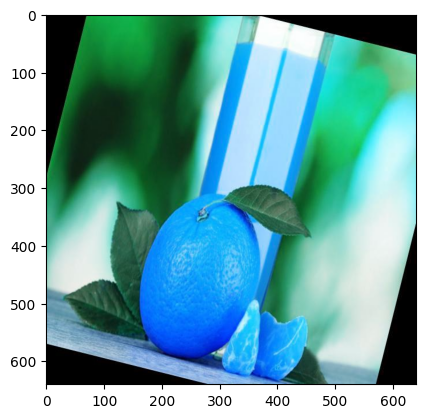

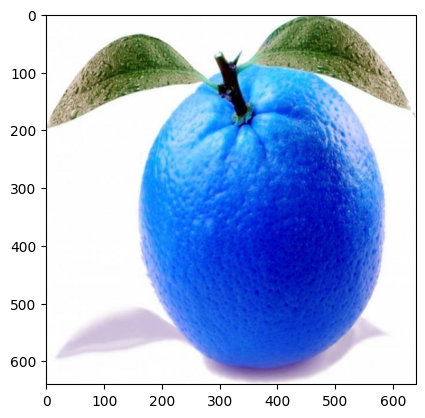

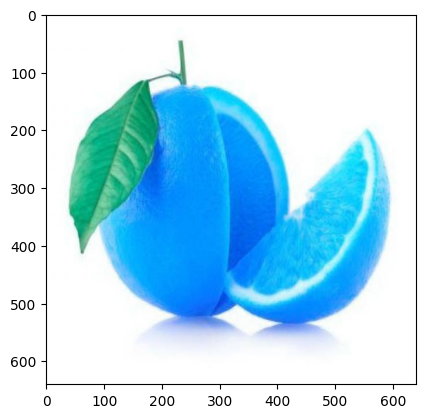

In [8]:
for idx, image in enumerate(os.listdir(os.path.join(image_dir, "train"))):
    img = cv2.imread(os.path.join(image_dir,"train", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

Train Dataframe

In [9]:
df = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}


#This is the way to handle xml format files which are in heirarchial form (trees).

for idx, anno in enumerate(glob.glob(label_dir+"/train" + '/*.xml')):

    trees = ET.parse(anno)

    print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df['label'] += [label]
                    df['width'] += [width]
                    df['height'] += [height]
                    df['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df['ymax'] += [ymax]

Streaming output truncated to the last 5000 lines.
<Element 'size' at 0x7f7c178584a0>
<Element 'width' at 0x7f7c178592b0>
<Element 'height' at 0x7f7c17859990>
<Element 'depth' at 0x7f7c1785a1b0>
<Element 'segmented' at 0x7f7c1785a8e0>
<Element 'object' at 0x7f7c1785a4d0>
<Element 'name' at 0x7f7c1785b790>
<Element 'pose' at 0x7f7c17859a30>
<Element 'truncated' at 0x7f7c17859530>
<Element 'difficult' at 0x7f7c1785b150>
<Element 'occluded' at 0x7f7c17858450>
<Element 'bndbox' at 0x7f7c17859850>
<Element 'xmin' at 0x7f7c17858db0>
<Element 'xmax' at 0x7f7c17858c70>
<Element 'ymin' at 0x7f7c1785b560>
<Element 'ymax' at 0x7f7c17859fd0>
/content/drive/MyDrive/CV_final_project/Final_data/labels/train/621_jpg.rf.4dd18cdb55eb1a0c3052d3ae04255c81.xml
<Element 'annotation' at 0x7f7c17858680>
<Element 'folder' at 0x7f7c1785bb50>
<Element 'filename' at 0x7f7c17859120>
<Element 'path' at 0x7f7c1785b1f0>
<Element 'source' at 0x7f7c1785a7f0>
<Element 'database' at 0x7f7c17859df0>
<Element 'size' at 0x7

Val Dataframe

In [10]:
df2 = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}

for idx, anno in enumerate(glob.glob(label_dir+"/val" + '/*.xml')):

    trees = ET.parse(anno)

    #print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        #print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df2['label'] += [label]
                    df2['width'] += [width]
                    df2['height'] += [height]
                    #dataset['name']+=[anno.split('/')[-1][0:-4]]
                    df2['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df2['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df2['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df2['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df2['ymax'] += [ymax]

In [11]:
import pandas as pd
train_df = pd.DataFrame(df)
val_df=pd.DataFrame(df2)
#df1.head()
val_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax
0,good-202-_jpg.rf.bd4658679651a5b325f57b1333b03eb1,Fresh Tomato,640,640,248,120,579,446
1,good-224-_jpg.rf.5df241c1aadfb8d8123d340044104c88,Fresh Tomato,640,640,234,141,584,486
2,good-51-_jpg.rf.b43e659c0a217e0d4c336b26c93632d1,Fresh Tomato,640,640,92,72,381,371
3,good-31-_jpg.rf.28b92b3b4e992d015747bcbb8249f550,Fresh Tomato,640,640,66,96,398,410
4,good-4-_jpg.rf.28dc6ca6966f74d85e5c85585b803194,Fresh Tomato,640,640,140,56,434,363


visualize

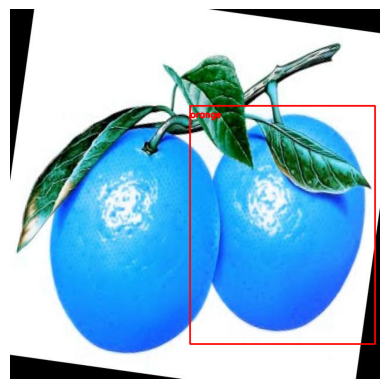

In [12]:
index= 10 #picture to visualize

#import cv2
image = cv2.imread(os.path.join(image_dir,"train", train_df["name"][index]+".jpg"), 1)
# Draw rectangle
cv2.rectangle(image, (train_df['xmin'][index], train_df['ymin'][index]), (train_df['xmax'][index], train_df['ymax'][index]), (255, 0, 0), 2)
# Put label (class_id) near the bbox
label = train_df["label"][index]
cv2.putText(image, str(label), (train_df['xmin'][index], train_df['ymin'][index]+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
# Display image
plt.imshow(image)
plt.axis('off')
plt.show()

In [13]:
train_df["name"][index]
filtered_df = train_df[train_df['name'] == train_df["name"][index]]
print(filtered_df)

                                                 name   label  width  height  \
9   orange_32_jpg.rf.9817569e0d615f3db1c2512ac91865b1  orange    640     640   
10  orange_32_jpg.rf.9817569e0d615f3db1c2512ac91865b1  orange    640     640   

    xmin  ymin  xmax  ymax  
9     39   181   411   638  
10   311   167   631   579  


In [14]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    1086 non-null   object
 1   label   1086 non-null   object
 2   width   1086 non-null   int64 
 3   height  1086 non-null   int64 
 4   xmin    1086 non-null   int64 
 5   ymin    1086 non-null   int64 
 6   xmax    1086 non-null   int64 
 7   ymax    1086 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 68.0+ KB


labels


In [15]:
print(train_df['label'].unique())
print(val_df['label'].unique())

['orange' 'rotten_tomato' 'rotten-banana' 'apple' 'banana' 'rotten-orange'
 'rotten_apple' 'Fresh Tomato' 'Rotten Tomato']
['Fresh Tomato' 'Rotten Tomato' 'rotten_tomato' 'rotten_apple'
 'rotten-orange' 'rotten-banana' 'banana' 'apple' 'orange']


In [17]:
label_map = { 'apple': 0,
            'rotten_apple': 1,
            'banana': 2,
              'rotten-banana':3,
              'orange': 4,
              'rotten-orange': 5,
              'Fresh Tomato': 6,
              'Rotten Tomato' : 7,
              'rotten_tomato':8 }

train_df['class'] = train_df['label'].map(label_map)
val_df['class'] = val_df['label'].map(label_map)

In [18]:
# Training data
train_df['x_center'] = (train_df['xmin']+train_df['xmax'])/(2*train_df["width"])
train_df['y_center'] = (train_df['ymin']+train_df['ymax'])/(2*train_df["height"])
train_df['box_width'] = (train_df['xmax']-train_df['xmin'])/ train_df["width"]
train_df['box_height'] = (train_df['ymax']-train_df['ymin'])/train_df["height"]

#Validation data
val_df['x_center'] = (val_df['xmin']+val_df['xmax'])/(2*val_df["width"])
val_df['y_center'] = (val_df['ymin']+val_df['ymax'])/(2*val_df["height"])
val_df['box_width'] = (val_df['xmax']-val_df['xmin'])/ val_df["width"]
val_df['box_height'] = (val_df['ymax']-val_df['ymin'])/val_df["height"]

In [19]:
train_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
0,orange_41_jpg.rf.b68f5ded4a0531e118a60676187058b8,orange,640,640,196,313,408,640,4,0.471875,0.744531,0.331250,0.510938
1,orange_37_jpg.rf.488e01fa967edb02fa2a4d10cc1f1537,orange,640,640,146,78,601,638,4,0.583594,0.559375,0.710938,0.875000
2,orange_3_jpg.rf.be084abb4689a5d7014ac33248251a35,orange,640,640,251,210,635,636,4,0.692187,0.660937,0.600000,0.665625
3,orange_3_jpg.rf.be084abb4689a5d7014ac33248251a35,orange,640,640,177,1,507,310,4,0.534375,0.242969,0.515625,0.482812
4,orange_3_jpg.rf.be084abb4689a5d7014ac33248251a35,orange,640,640,1,158,368,545,4,0.288281,0.549219,0.573438,0.604688


In [20]:
#training
print("before deleting (train data): " , train_df.shape)
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
print("after deleting(train_data): " ,train_df.shape)

#validation
print("before deleting (val data): " , val_df.shape)
val_df.replace([np.inf, -np.inf], np.nan, inplace=True)
val_df.dropna(inplace=True)
print("after deleting(val data): " , val_df.shape)

before deleting (train data):  (4349, 13)
after deleting(train_data):  (4349, 13)
before deleting (val data):  (1086, 13)
after deleting(val data):  (1086, 13)


In [21]:
train_df = train_df.astype(str)
val_df = val_df.astype(str)

In [22]:
#file_name = [x.split('.')[0] for x in df1["name"]]

#TRAINING DATA
#finding all the unique names:
unique_names= train_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = train_df[train_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/train/{name}.txt', 'w') as file:
            file.write(text)
#############################################################################################
#VALIDATION DATA
#finding all the unique names:
unique_names= val_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = val_df[val_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/val/{name}.txt', 'w') as file:
            file.write(text)

YOLO

In [23]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.43 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [24]:
from ultralytics import YOLO

In [25]:
model = YOLO('yolov8s.pt') # pretrained model

100%|██████████| 21.5M/21.5M [00:00<00:00, 241MB/s]


In [30]:
%%writefile config.yaml
path: /content/drive/MyDrive/CV_final_project/Final_data
train: /content/drive/MyDrive/CV_final_project/Final_data/images/train
#test: (test dataset folder path)
val: /content/drive/MyDrive/CV_final_project/Final_data/images/val

# Classes
nc: 9 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: apple
  1: rotten_apple
  2: banana
  3: rotten-banana
  4: orange
  5: rotten-orange
  6: Fresh Tomato
  7: Rotten Tomato
  8: rotten_tomato

Overwriting config.yaml


In [31]:
#https://docs.ultralytics.com/modes/train/

#epochs: Total number of training epochs. Each epoch represents a full pass over the entire dataset. Adjusting this value can affect training duration and model performance
#patience:Number of epochs to wait without improvement in validation metrics before early stopping the training. Helps prevent overfitting by stopping training when performance plateaus.
#batch size: Batch size, with three modes: set as an integer (e.g., batch=16), auto mode for 60% GPU memory utilization (batch=-1), or auto mode with specified utilization fraction (batch=0.70).
#lr0: Initial learning rate (i.e. SGD=1E-2, Adam=1E-3) . Adjusting this value is crucial for the optimization process, influencing how rapidly model weights are updated.
#imgsz: Target image size for training. All images are resized to this dimension before being fed into the model. Affects model accuracy and computational complexity.

#1st Model parameters
# model.train(data="config.yaml",epochs=20,patience=5,batch=16, lr0=0.001,imgsz=640)

model.train( data="config.yaml", epochs=20, patience=5, batch=16, lr0=0.001, imgsz=640, weight_decay=0.0001, momentum=0.9, dropout=0.5 )


Ultralytics 8.3.43 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=20, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

train: Scanning /content/drive/.shortcut-targets-by-id/1GF3wTh1FoKKGQGBXyoXpRO_PvYbqqw_F/CV_final_project/Final_data/labels/train... 2956 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2974/2974 [01:04<00:00, 45.89it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1GF3wTh1FoKKGQGBXyoXpRO_PvYbqqw_F/CV_final_project/Final_data/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/.shortcut-targets-by-id/1GF3wTh1FoKKGQGBXyoXpRO_PvYbqqw_F/CV_final_project/Final_data/labels/val... 914 images, 1 backgrounds, 0 corrupt: 100%|██████████| 915/915 [00:18<00:00, 49.90it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1GF3wTh1FoKKGQGBXyoXpRO_PvYbqqw_F/CV_final_project/Final_data/labels/val.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.9' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       4.1G       1.56      2.258      1.928         42        640: 100%|██████████| 186/186 [01:37<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:15<00:00,  1.92it/s]


                   all        915       1086       0.77      0.658      0.783      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.96G      1.019      1.214      1.482         37        640: 100%|██████████| 186/186 [01:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:13<00:00,  2.22it/s]

                   all        915       1086      0.806      0.801      0.861      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.08G     0.9506      1.023      1.408         38        640: 100%|██████████| 186/186 [01:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:13<00:00,  2.12it/s]

                   all        915       1086      0.829        0.8      0.874      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.09G     0.9402     0.9421      1.392         44        640: 100%|██████████| 186/186 [01:27<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:17<00:00,  1.62it/s]

                   all        915       1086      0.841      0.818       0.88       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.08G     0.8829     0.8827      1.347         50        640: 100%|██████████| 186/186 [01:31<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:12<00:00,  2.29it/s]

                   all        915       1086      0.796      0.847       0.85      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.12G     0.8698     0.8111      1.331         56        640: 100%|██████████| 186/186 [01:24<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:16<00:00,  1.74it/s]

                   all        915       1086      0.836      0.791      0.883      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.09G     0.8461      0.781      1.311         44        640: 100%|██████████| 186/186 [01:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:12<00:00,  2.31it/s]

                   all        915       1086      0.843       0.87      0.912      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.11G     0.8335     0.7451      1.301         31        640: 100%|██████████| 186/186 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:15<00:00,  1.83it/s]

                   all        915       1086      0.868      0.898      0.943      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.09G     0.7944     0.7023      1.273         49        640: 100%|██████████| 186/186 [01:27<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:14<00:00,  2.04it/s]

                   all        915       1086      0.834       0.88      0.887      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.08G     0.7901     0.6771      1.267         45        640: 100%|██████████| 186/186 [01:26<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:14<00:00,  1.98it/s]

                   all        915       1086      0.852      0.915        0.9      0.703


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.09G     0.7329     0.5399        1.3         15        640: 100%|██████████| 186/186 [01:25<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:16<00:00,  1.74it/s]

                   all        915       1086      0.883      0.891      0.929      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.93G     0.6955     0.4912      1.262         21        640: 100%|██████████| 186/186 [01:21<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:15<00:00,  1.86it/s]

                   all        915       1086      0.841       0.91      0.888      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.07G     0.6703     0.4446       1.25         26        640: 100%|██████████| 186/186 [01:29<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:14<00:00,  2.03it/s]

                   all        915       1086      0.861      0.893      0.943      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.09G     0.6627     0.4247      1.236         19        640: 100%|██████████| 186/186 [01:24<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:16<00:00,  1.75it/s]

                   all        915       1086      0.902      0.873      0.911      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.07G     0.6305     0.4006      1.214         17        640: 100%|██████████| 186/186 [01:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:14<00:00,  1.95it/s]

                   all        915       1086      0.923       0.89      0.939      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.09G     0.6303     0.3823      1.196         15        640: 100%|██████████| 186/186 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.42it/s]

                   all        915       1086      0.912      0.908       0.95      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.07G     0.6018     0.3691      1.185         16        640: 100%|██████████| 186/186 [01:30<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:15<00:00,  1.88it/s]

                   all        915       1086       0.92      0.893      0.944      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       4.1G      0.581     0.3463      1.171         18        640: 100%|██████████| 186/186 [01:22<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:16<00:00,  1.74it/s]

                   all        915       1086      0.895      0.929      0.944       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.08G     0.5632     0.3339      1.161         26        640: 100%|██████████| 186/186 [01:29<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:14<00:00,  1.99it/s]

                   all        915       1086      0.902      0.923      0.948      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.11G      0.561     0.3315      1.146         15        640: 100%|██████████| 186/186 [01:27<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:12<00:00,  2.24it/s]

                   all        915       1086       0.92      0.918      0.953      0.775



20 epochs completed in 0.585 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.43 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,129,067 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.29it/s]


                   all        915       1086       0.92      0.918      0.953      0.776
                 apple         26         33      0.783      0.909      0.936      0.802
          rotten_apple         48         48      0.941      0.979      0.975      0.947
                banana         25         50      0.828      0.771       0.83      0.493
         rotten-banana         47         82      0.879      0.798      0.924      0.549
                orange         20         28          1      0.943      0.967      0.736
         rotten-orange         35         37      0.965      0.973      0.992       0.96
          Fresh Tomato        198        248      0.992      0.979      0.994      0.835
         Rotten Tomato        122        122      0.922      0.967      0.975       0.82
         rotten_tomato        405        438      0.967      0.945      0.988      0.837
Speed: 0.4ms preprocess, 4.7ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f7af614d9c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

In [32]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.43 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,129,067 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/drive/.shortcut-targets-by-id/1GF3wTh1FoKKGQGBXyoXpRO_PvYbqqw_F/CV_final_project/Final_data/labels/val.cache... 914 images, 1 backgrounds, 0 corrupt: 100%|██████████| 915/915 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:25<00:00,  2.31it/s]


                   all        915       1086       0.92      0.918      0.954      0.776
                 apple         26         33      0.783      0.909      0.936      0.801
          rotten_apple         48         48      0.941      0.979      0.975      0.947
                banana         25         50      0.828       0.77      0.831      0.494
         rotten-banana         47         82      0.879      0.795      0.924      0.548
                orange         20         28          1      0.943      0.967      0.736
         rotten-orange         35         37      0.965      0.973      0.992      0.963
          Fresh Tomato        198        248      0.992      0.979      0.994      0.835
         Rotten Tomato        122        122      0.922      0.967      0.975      0.821
         rotten_tomato        405        438      0.969      0.945      0.988      0.838
Speed: 0.5ms preprocess, 9.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect

0.9176773422905714